In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
# import the dataset
df = pd.read_csv('data/Auto.csv')
df = df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [5]:

# Convert all the boolean columns to integers
mask = df.dtypes == bool
# Select the boolean columns
bool_cols = df.columns[mask]
# Convert the boolean columns to integers
df[bool_cols] = df[bool_cols].astype(int)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
# Standardize the data
scaler = StandardScaler()
# Select numerical columns
y_col = 'mpg'
df = df.select_dtypes(include=[np.number])
df_standardized = scaler.fit_transform(df.drop(y_col, axis=1))
df_standardized = pd.DataFrame(df_standardized, columns=df.columns.drop(y_col))
y = df[y_col]
df_standardized.head()

,cylinders,displacement,weight,acceleration,year,origin
0,1.495535,1.088435,0.630274,-1.294604,-1.626699,-0.716507
1,1.495535,1.500913,0.853457,-1.476652,-1.626699,-0.716507
2,1.495535,1.193953,0.549975,-1.658700,-1.626699,-0.716507
3,1.495535,1.059658,0.546432,-1.294604,-1.626699,-0.716507
4,1.495535,1.040473,0.565326,-1.840747,-1.626699,-0.716507


In [7]:
# Fit the PCA
pca = PCA(n_components=df_standardized.shape[1])
pca.fit(df_standardized)


PCA(n_components=6)

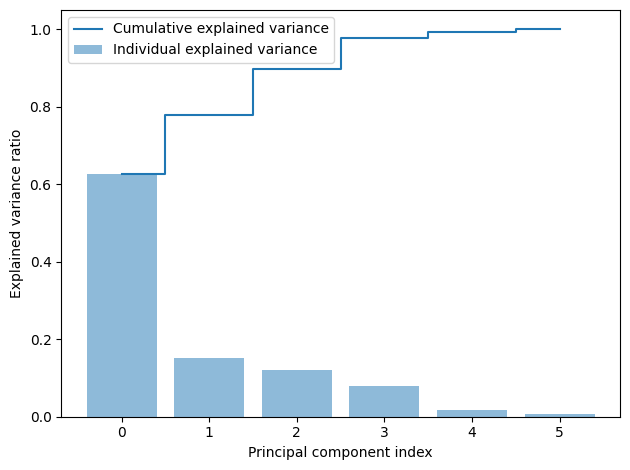

In [8]:
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [9]:
# Find index where cumulative explained variance is greater than 0.9
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > 0.9) + 1
print(f'Number of components explaining 90% of variance: {index_selected}')

Number of components explaining 90% of variance: 4


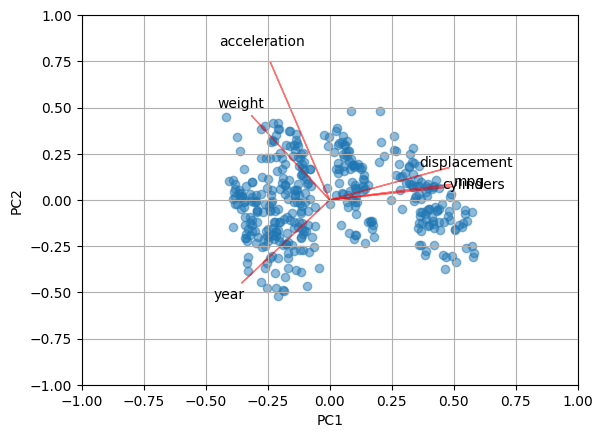

In [10]:
pca = PCA()
x_new = pca.fit_transform(df_standardized)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, str(df.columns[i]), color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

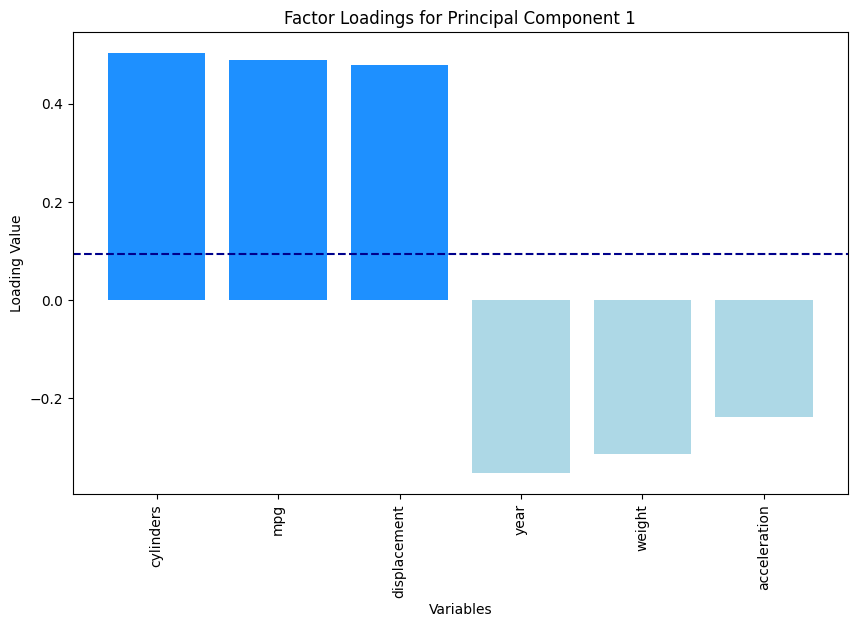

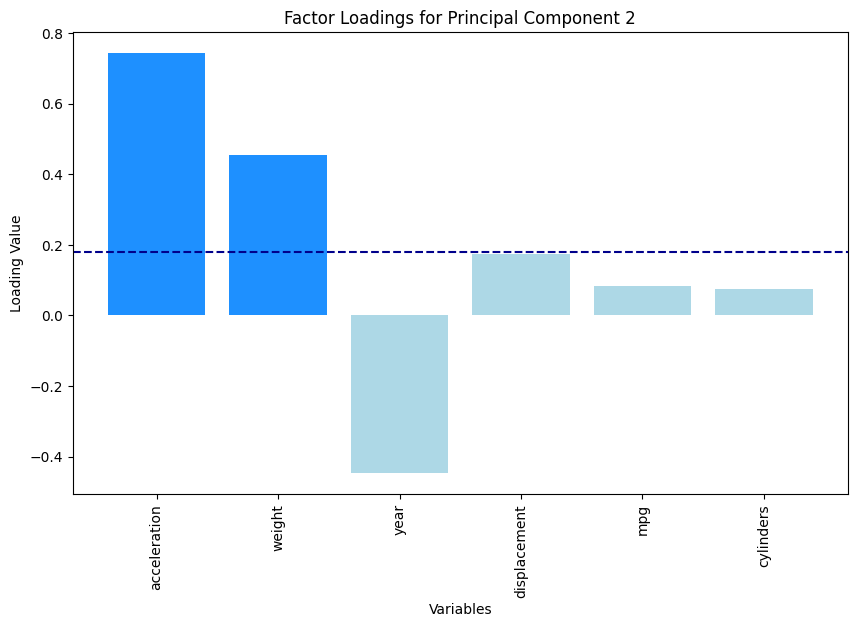

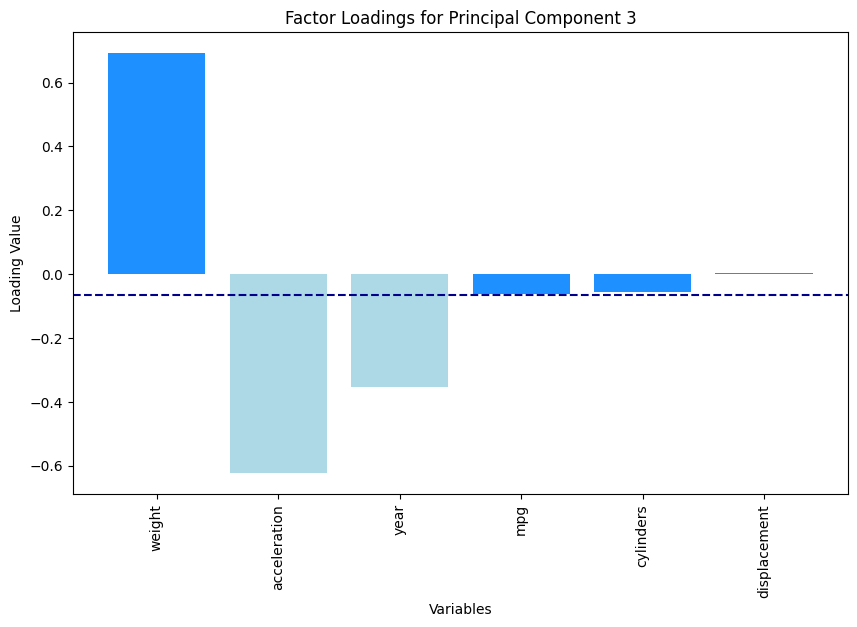

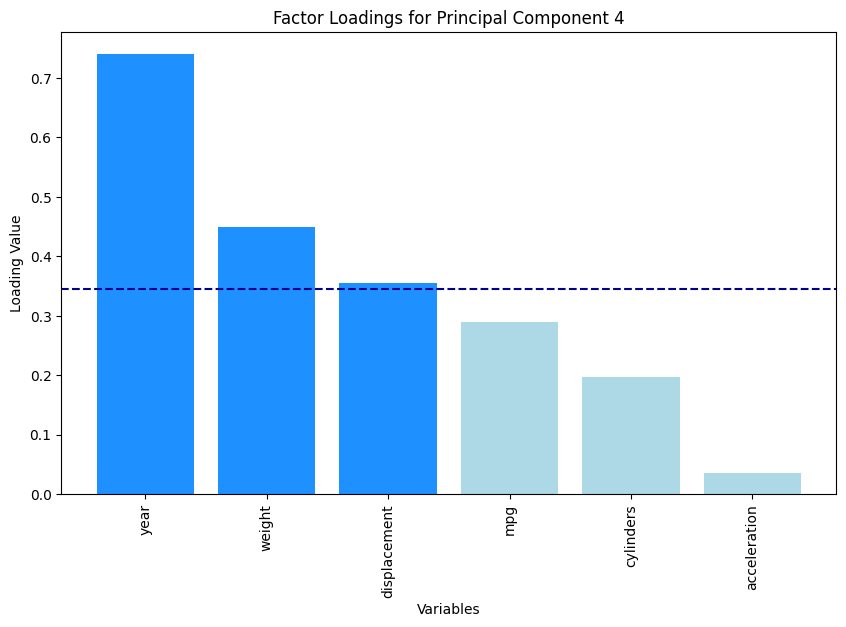

In [11]:
loadings = pca.components_.T

# Plotting
for i in range(index_selected): # range(loadings.shape[1]) to plot all components
    sorted_idx = np.argsort(abs(loadings[:, i]))[::-1]
    sorted_loadings = loadings[sorted_idx, i]
    vars = df.columns[sorted_idx]
    mean_loading = np.mean(sorted_loadings)
    
    # Colors based on comparison with the mean
    colors = ['dodgerblue' if loading >= mean_loading else 'lightblue' for loading in sorted_loadings]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_loadings)), sorted_loadings, color=colors)
    plt.title(f'Factor Loadings for Principal Component {i+1}')
    plt.xticks(range(len(sorted_loadings)), vars, rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Loading Value')
    plt.axhline(mean_loading, color='darkblue', linestyle='--')
    plt.show()

In [12]:
X = df_standardized

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 13.109650233537895


In [13]:
# Make regression model on PCA
X = x_new[:, :index_selected]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)

# Calculate the mean squared error
new_mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {new_mse}')

Mean Squared Error: 15.142395718838083


In [14]:
mse_ratio = round(mse / new_mse, 10)
print(f'MSE Ratio: {mse_ratio}')

MSE Ratio: 0.8657580001
